In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Reading Data

In [2]:
train_origin = pd.read_csv("./data/creditcard_train.csv")
test_origin  = pd.read_csv("./data/creditcard_test.csv")

# Evaluating data

In [8]:
train_origin.head(20)

,Id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


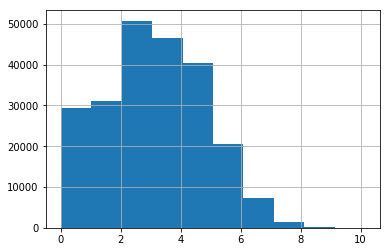

In [7]:
np.log(train_origin.Amount+1).hist()

In [320]:
#train_origin = train_origin - (train_origin.min(axis = 0))
#train_origin.describe()
data = train_origin[train_origin.columns[1:31]]
target = train_origin[train_origin.columns[31]]
data.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68


In [321]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [322]:
#train_origin = train_origin/(train_origin.max(axis = 0) + np.spacing(0))
#train_origin.describe()
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler().fit_transform(data)

array([[0.00000000e+00, 9.14113523e-01, 7.40867902e-01, ...,
        2.41614561e-01, 4.04966298e-01, 5.82379309e-03],
       [0.00000000e+00, 9.71608526e-01, 7.44836547e-01, ...,
        2.38180443e-01, 4.05906563e-01, 1.04705276e-04],
       [5.78730497e-06, 9.14146264e-01, 7.26027786e-01, ...,
        2.37063301e-01, 4.03949251e-01, 1.47389219e-02],
       ...,
       [9.99976851e-01, 9.88005499e-01, 7.38192654e-01, ...,
        2.38504189e-01, 4.04821547e-01, 2.64215395e-03],
       [9.99976851e-01, 9.39335499e-01, 7.47931679e-01, ...,
        2.41018580e-01, 4.08266833e-01, 3.89238944e-04],
       [1.00000000e+00, 9.32734139e-01, 7.39498478e-01, ...,
        2.38338674e-01, 4.05878304e-01, 8.44648509e-03]])

In [323]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [324]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
for i in range(1, 31):
    data_selected = SelectKBest(chi2, k = i).fit_transform(data, target)
    data_after_balancing = percentageSample(data_selected)
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)
    
def percentageSample (train_origin):
    bad_ones  = train_origin[train_origin.Class == 1 ]
    safe_ones = train_origin[train_origin.Class == 0 ]

    percentage = 1 #len(bad_ones)/float(len(safe_ones))
    #percentage = test_origin.shape[0]/float(len(safe_ones))
    print(percentage)
    sampled_safe_ones = safe_ones.sample(frac=percentage, random_state = 33)
    print(bad_ones.shape, sampled_safe_ones.shape, sep = ",")
    train_after_balancing = pd.concat([bad_ones, sampled_safe_ones], axis = 0)
    print(train_after_balancing.shape)
    train_after_balancing["Class"].value_counts(normalize=True)
    
    return train_after_balancing

ValueError: Input X must be non-negative.

In [278]:
test_origin.head()

,Id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,11,10,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,...,0.125992,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,9.99
1,17,13,-0.436905,0.918966,0.924591,-0.727219,0.915679,-0.127867,0.707642,0.087962,...,-0.047021,-0.194796,-0.672638,-0.156858,-0.888386,-0.342413,-0.049027,0.079692,0.131024,0.89
2,18,14,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,...,-2.196848,-0.503600,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80
3,20,16,0.694885,-1.361819,1.029221,0.834159,-1.191209,1.309109,-0.878586,0.445290,...,-0.138334,-0.295583,-0.571955,-0.050881,-0.304215,0.072001,-0.422234,0.086553,0.063499,231.71
4,27,23,1.322707,-0.174041,0.434555,0.576038,-0.836758,-0.831083,-0.264905,-0.220982,...,-0.522951,-0.284376,-0.323357,-0.037710,0.347151,0.559639,-0.280158,0.042335,0.028822,16.00


In [279]:
test_origin.shape

(57018, 31)

In [280]:
test_origin = test_origin - (test_origin.min(axis = 0))
test_origin.describe()

,Id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,57018.000000,57018.000000,57018.000000,57018.000000,57018.000000,57018.000000,57018.000000,57018.000000,57018.000000,57018.000000,...,57018.000000,57018.000000,57018.000000,57018.000000,57018.000000,57018.000000,57018.000000,57018.000000,57018.000000,57018.000000
mean,142060.599530,94602.617331,56.393797,72.711956,32.454679,5.232100,25.790559,26.165848,31.763479,73.219953,...,23.425247,34.834360,8.886173,44.804669,2.790825,10.293739,2.067145,22.566775,11.709874,89.873844
std,82176.838344,47461.276963,1.986621,1.678306,1.543869,1.416669,1.369504,1.331605,1.223818,1.238695,...,0.761324,0.746611,0.731037,0.657651,0.608096,0.522877,0.480843,0.408471,0.358525,247.584342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70848.500000,54042.500000,55.483119,72.117029,31.565531,4.386835,25.099306,25.394640,31.212961,73.010057,...,23.207640,34.601068,8.341201,44.644269,2.435897,9.978371,1.741745,22.495327,11.657516,5.900000
50%,141995.000000,84539.000000,56.408166,72.780690,32.636478,5.213403,25.740038,25.891630,31.804353,73.239152,...,23.357675,34.801658,8.894327,44.796595,2.832381,10.309458,2.016395,22.567104,11.721941,22.290000
75%,213354.750000,139216.000000,57.718234,73.513438,33.485687,5.979466,26.410142,26.564967,32.336082,73.541293,...,23.554005,35.020116,9.419689,44.953840,3.232597,10.645692,2.307564,22.657963,11.790285,78.000000
max,284786.000000,172772.000000,58.862440,90.646278,41.836757,21.723045,60.592798,42.774560,60.004475,92.804491,...,43.166626,62.033221,19.390107,64.035904,6.751811,15.816537,5.531807,31.274652,45.558703,10000.000000


In [281]:
test_origin = test_origin/(test_origin.max(axis = 0) + np.spacing(0))
test_origin.describe()

,Id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,57018.000000,57018.000000,57018.000000,57018.000000,57018.000000,57018.000000,57018.000000,57018.000000,57018.000000,57018.000000,...,57018.000000,57018.000000,57018.000000,57018.000000,57018.000000,57018.000000,57018.000000,57018.000000,57018.000000,57018.000000
mean,0.498833,0.547558,0.958061,0.802150,0.775746,0.240855,0.425637,0.611715,0.529352,0.788970,...,0.542670,0.561544,0.458284,0.699680,0.413345,0.650821,0.373684,0.721568,0.257028,0.008987
std,0.288556,0.274705,0.033750,0.018515,0.036902,0.065215,0.022602,0.031131,0.020395,0.013347,...,0.017637,0.012036,0.037702,0.010270,0.090064,0.033059,0.086923,0.013061,0.007870,0.024758
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.248778,0.312797,0.942590,0.795587,0.754493,0.201944,0.414229,0.593686,0.520177,0.786708,...,0.537629,0.557783,0.430178,0.697176,0.360777,0.630882,0.314860,0.719283,0.255879,0.000590
50%,0.498602,0.489310,0.958305,0.802909,0.780091,0.239994,0.424804,0.605304,0.530033,0.789177,...,0.541105,0.561016,0.458704,0.699554,0.419499,0.651815,0.364509,0.721578,0.257293,0.002229
75%,0.749176,0.805779,0.980561,0.810992,0.800389,0.275259,0.435863,0.621046,0.538895,0.792432,...,0.545653,0.564538,0.485799,0.702010,0.478775,0.673073,0.417145,0.724483,0.258793,0.007800
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [282]:
train_origin.columns

Index(['Id', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [283]:
print(train_origin.isnull().values.any())
print(test_origin.isnull().values.any())

False
False


In [284]:
train_origin.dtypes

Id        float64
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

In [285]:
test_origin.dtypes

Id        float64
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
dtype: object

In [286]:
train_origin.Class.value_counts(normalize=True)

0.0    0.998266
1.0    0.001734
Name: Class, dtype: float64

#regular transaction is too much more than frauds, now we need to balance the data

In [287]:
train_origin.shape

(227789, 32)

# Preprocessiong Data

-- Drop the column 0 which is id

In [288]:
train = train_origin.drop(["Id"], axis = 1)
test  = test_origin.drop(["Id"], axis = 1)
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.914114,0.740868,0.967846,0.313023,0.767066,0.247516,0.266815,0.719403,0.579086,...,0.455582,0.581027,0.617550,0.391253,0.507766,0.394557,0.241615,0.404966,0.005824,0.0
1,0.000000,0.971609,0.744837,0.922750,0.271796,0.769760,0.241888,0.264875,0.719211,0.553098,...,0.451433,0.533527,0.621128,0.336440,0.510339,0.446013,0.238180,0.405907,0.000105,0.0
2,0.000006,0.914146,0.726028,0.953324,0.268766,0.765950,0.261339,0.270177,0.721503,0.500249,...,0.460908,0.606621,0.634780,0.289354,0.477385,0.402727,0.237063,0.403949,0.014739,0.0
3,0.000006,0.922981,0.739551,0.953701,0.213661,0.769284,0.255623,0.266803,0.723332,0.505606,...,0.453782,0.566900,0.616201,0.223826,0.542320,0.389197,0.239908,0.407135,0.004807,0.0
4,0.000012,0.918655,0.751998,0.949052,0.269796,0.766600,0.243730,0.268968,0.714199,0.598138,...,0.455759,0.607999,0.617094,0.401270,0.485486,0.507497,0.243683,0.411174,0.002724,0.0


In [289]:
test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,0.964834,0.808989,0.754836,0.236514,0.473913,0.689137,0.537217,0.794735,0.355814,...,0.545472,0.562284,0.470623,0.699871,0.560786,0.602413,0.284962,0.722891,0.255858,0.000999
1,0.000017,0.950871,0.812330,0.797834,0.207365,0.440759,0.608601,0.541169,0.789883,0.351572,...,0.541463,0.558339,0.423638,0.697279,0.281588,0.629277,0.365077,0.724081,0.259927,0.000089
2,0.000023,0.866533,0.742067,0.804090,0.320768,0.475968,0.570365,0.503383,0.790668,0.427275,...,0.491660,0.553361,0.509099,0.738122,0.419403,0.620475,0.261630,0.734068,0.277894,0.004680
3,0.000035,0.970099,0.787169,0.800335,0.279242,0.405988,0.642195,0.514734,0.793733,0.360309,...,0.539348,0.556715,0.428830,0.698934,0.368109,0.655478,0.297611,0.724300,0.258444,0.023171
4,0.000075,0.980765,0.800272,0.786121,0.267360,0.411837,0.592161,0.524962,0.786554,0.335376,...,0.530438,0.556895,0.441651,0.699139,0.464581,0.686309,0.323295,0.722886,0.257683,0.001600


-- Balancing data, as the safe transactions and frauds were extemely unbalanced
here we use the size of the test set to sample the train set

In [290]:
bad_ones  = train_origin[train_origin.Class == 1 ]
safe_ones = train_origin[train_origin.Class == 0 ]

percentage = 1 #len(bad_ones)/float(len(safe_ones))
#percentage = test_origin.shape[0]/float(len(safe_ones))
print(percentage)
sampled_safe_ones = safe_ones.sample(frac=percentage, random_state = 33)
print(bad_ones.shape, sampled_safe_ones.shape, sep = ",")

1
(395, 32),(227394, 32)


In [291]:
train_after_balancing = pd.concat([bad_ones, sampled_safe_ones], axis = 0)
print(train_after_balancing.shape)

(227789, 32)


In [292]:
train_after_balancing["Class"].value_counts(normalize=True)

0.0    0.998266
1.0    0.001734
Name: Class, dtype: float64

# Splitting the train data set to training set and validation set 

In [293]:
X = train_after_balancing[train_after_balancing.columns[:30]]
y = train_after_balancing.Class
X.shape, y.shape

((227789, 30), (227789,))

In [294]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [295]:
print( xtrain.shape, xtest.shape, ytrain.shape, ytest.shape, sep=",")

(182231, 30),(45558, 30),(182231,),(45558,)


In [296]:
xtrain.head()

,Id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
122528,0.538405,0.570837,0.907913,0.729174,0.976883,0.337614,0.759923,0.258027,0.266257,0.723690,...,0.614003,0.589446,0.460549,0.599236,0.627412,0.370822,0.541807,0.390277,0.239009,0.408741
24473,0.107736,0.208551,0.969858,0.744033,0.948508,0.380680,0.764355,0.246981,0.262039,0.720139,...,0.519412,0.578899,0.456578,0.592493,0.617057,0.445167,0.542431,0.459717,0.239719,0.406281
165656,0.727590,0.790395,0.932090,0.738448,0.940964,0.158215,0.768007,0.234446,0.268709,0.715206,...,0.551265,0.583461,0.463256,0.611174,0.619439,0.385944,0.497208,0.377244,0.240520,0.409524
166219,0.730055,0.792224,0.883328,0.734911,0.925999,0.381168,0.790960,0.236914,0.269283,0.709067,...,0.456476,0.569329,0.454964,0.601323,0.604227,0.252148,0.505734,0.439161,0.220490,0.426845
192694,0.846362,0.873079,0.925495,0.750060,0.920748,0.218063,0.778842,0.246344,0.270332,0.718813,...,0.480092,0.578006,0.455058,0.577826,0.623436,0.248108,0.430706,0.460857,0.239691,0.413826


In [297]:
ytrain.head()

122528    0.0
24473     0.0
165656    0.0
166219    0.0
192694    0.0
Name: Class, dtype: float64

# Now data is ready for different models

# 1.  Decision tree

In [298]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier()
model_DT.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [299]:
prediction_DT_on_validation_set = model_DT.predict(xtest)

In [300]:
print(accuracy_score(ytest, prediction_DT_on_validation_set))
print(classification_report(ytest, prediction_DT_on_validation_set))
print(confusion_matrix(ytest, prediction_DT_on_validation_set))

0.9989244479564511
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     45474
        1.0       0.72      0.68      0.70        84

avg / total       1.00      1.00      1.00     45558

[[45452    22]
 [   27    57]]


Cross validation with different max_depth of tree

In [ ]:
depthRange = range(1, 50)
scores_DT = []
for i in depthRange:
    model_DT_w_depth = DecisionTreeClassifier(criterion="entropy", max_depth = i)
    #model_w_depth.fit(xtrain, ytrain)
    score = cross_val_score(model_DT_w_depth,
                           X,
                           y,
                           cv = 5, 
                           scoring = "f1")
    scores_DT.append(score.mean())
print(*scores_DT, sep="\n")

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
plt.plot(depthRange, scores_DT)

In [537]:
scores_DT.index(max(scores_DT)) + 1

4

#now we have the best max_depth, train the model again

In [538]:
model_DT_depth_4 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [539]:
model_DT_depth_4.fit(X, y)
result_DT = model_DT_depth_4.predict(test)
print(result_DT)

[0 0 0 ... 0 0 0]


(array([54974.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2044.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

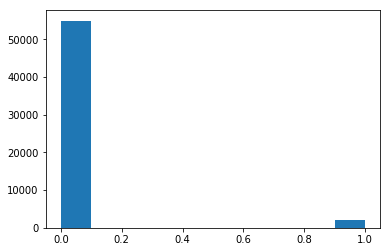

In [540]:
plt.hist(result_DT)

In [541]:
submission_DT = pd.DataFrame({"Id": test_origin.Id[result_DT==1], "Class": 1})
submission_DT.to_csv("submission_decision_tree.csv", columns=["Id", "Class"], header = True, index = False)

In [542]:
submission_DT_2 = pd.DataFrame({"Id": test_origin.Id, "Class": result_DT})
submission_DT_2.to_csv("submission_decision_tree_jieling_maxdepth4.csv", columns=["Id", "Class"], header = True, index = False)

# 2. Logistic Regression

In [197]:
from sklearn.linear_model import LogisticRegression 

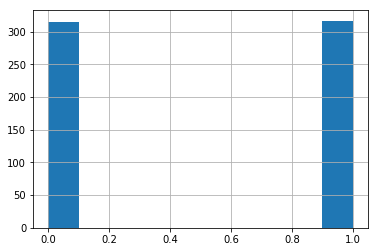

In [208]:
ytrain.hist()

In [198]:
model_LR = LogisticRegression()
model_LR.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [199]:
prediction_LR_on_validation_set = model_LR.predict(xtest)

In [200]:
print(accuracy_score(ytest, prediction_LR_on_validation_set))
print(classification_report(ytest,prediction_LR_on_validation_set))
print(confusion_matrix(ytest, prediction_LR_on_validation_set))

0.930379746835443
             precision    recall  f1-score   support

        0.0       0.88      1.00      0.94        80
        1.0       1.00      0.86      0.92        78

avg / total       0.94      0.93      0.93       158

[[80  0]
 [11 67]]


Cross validation with different R

In [201]:
expRange = range(-5,10 )
scores_LR = []
for i in expRange:
    r = 10**i
    model_RT_with_C=LogisticRegression(C=r)
    score = cross_val_score(model_RT_with_C,
                           X,
                           y,
                           cv=5,
                           scoring = "f1")
    scores_LR.append(score.mean())
print(*scores_LR, sep="\n")

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-sco

0.023809523809523815
0.11674242424242424
0.4030385170088101
0.6994992560554809
0.8422625586979496
0.9000959983718004
0.9260525382066248
0.9270440251572328
0.9275205327413986
0.9269429520302112
0.929695279253853
0.9337154628918711
0.9337154628918711
0.9337154628918711
0.9337154628918711


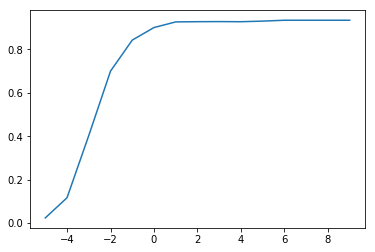

In [202]:
plt.plot(expRange, scores_LR)

In [203]:
scores_LR.index(max(scores_LR)) - 5

6

In [204]:
model_LR_C_point1 = LogisticRegression(C=6)
model_LR_C_point1.fit(X, y)
result_LR = model_LR_C_point1.predict(test)

In [206]:
print(result_LR)

[1. 1. 1. ... 1. 1. 1.]


(array([1.8e+01, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00,
        0.0e+00, 0.0e+00, 5.7e+04]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

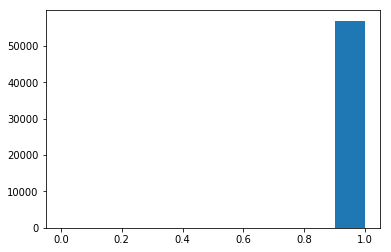

In [205]:
plt.hist(result_LR)

In [554]:
submission_LR = pd.DataFrame({"Id": test_origin.Id[result_LR==1], "Class": 1})
submission_LR.to_csv("submission_logistic_regression.csv", columns=["Id", "Class"], header = True, index = False)

In [96]:
submission_LR_2 = pd.DataFrame({"Id": test_origin.Id, "Class": result_LR})
submission_LR_2.to_csv("submission_logistic_regression_Jie_Ling_0.1.csv", columns=["Id", "Class"], header = True, index = False)

# 3. Naive Bayes
Use Gaussian Bayes model

In [245]:
from sklearn.naive_bayes import GaussianNB

model_NB = GaussianNB()
model_NB.fit(xtrain, ytrain)
prediction_NB_on_validation_set = model_NB.predict(xtest)

In [249]:
print(accuracy_score(ytest, prediction_NB_on_validation_set))
print(classification_report(ytest, prediction_NB_on_validation_set))
print(confusion_matrix(ytest, prediction_NB_on_validation_set))

0.9113924050632911
             precision    recall  f1-score   support

          0       0.87      0.97      0.92        80
          1       0.97      0.85      0.90        78

avg / total       0.92      0.91      0.91       158

[[78  2]
 [12 66]]


In [250]:
result_NB = model_NB.predict(test)

(array([56194.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   824.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

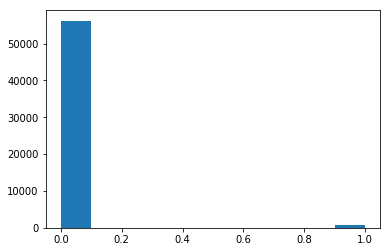

In [251]:
plt.hist(result_NB)

In [296]:
submission_NB = pd.DataFrame({"Id": test_origin.Id[result_NB==1], "Class": 1})
submission_NB.to_csv("submission_Naive_Bayes.csv", columns=["Id", "Class"], header = True, index = False)

# Conclusion:

In [256]:
print(" For this data set: \n")
print(" The best f1 score of Decision Tree is       " + str(max(scores_DT)))
print(" The best f1 score of Logistic Regression is " + str(max(scores_LR)))
print(" The f1 score of Decision Tree is            " + str(0.9))

 For this data set: 

 The best f1 score of Decision Tree is       0.9213428097239337
 The best f1 score of Logistic Regression is 0.9263765193174864
 The f1 score of Decision Tree is            0.9
